In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

In [2]:
!cd

C:\Users\khl06\Desktop\Mr.GentleKim\21KDT\21KDT-Project\DataAnalysis&Visualization\기후 데이터를 활용한 모기 발생 예보\작업


## 1. 서울 DMS + 기후

### Reading Data

In [3]:
df1 = pd.read_csv('../데이터/통합 데이터/1. dms_seoul.csv')

df1

,date,mosquito,temp,l_temp,h_temp,rain_per_day,cum_rain,wind,dew,humidity,steam_pressure,sunshine_time,sunshine,ground_surface_temp
0,2015-04-06,199,10.3,6.9,15.4,NaN,0,2.7,1.2,55.8,6.8,1.7,10.20,11.0
1,2015-04-07,146,8.4,5.5,12.2,NaN,0,2.6,0.9,59.5,6.5,4.7,10.17,11.6
2,2015-04-08,90,8.3,3.5,13.7,NaN,0,2.9,-1.3,52.5,5.6,8.3,14.69,9.6
3,2015-04-09,172,9.6,3.8,16.3,NaN,0,2.3,-2.8,43.0,5.0,10.8,18.20,11.8
4,2015-04-10,249,11.6,4.6,19.2,NaN,0,2.8,-2.2,40.5,5.3,11.6,20.67,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,2020-10-27,535,14.0,9.0,19.4,NaN,0,1.8,9.0,74.1,11.6,8.3,12.23,13.2
1169,2020-10-28,884,13.8,8.6,18.2,NaN,0,2.5,2.8,52.1,8.2,9.2,15.27,13.8
1170,2020-10-29,695,10.8,5.5,16.1,NaN,0,2.0,-2.6,40.3,5.1,9.0,13.77,11.5
1171,2020-10-30,543,11.9,5.8,19.6,NaN,0,1.5,-0.8,42.9,5.8,9.7,14.62,11.2


In [4]:
df1.isnull().sum()

date                     0
mosquito                 0
temp                     0
l_temp                   0
h_temp                   1
rain_per_day           795
cum_rain                 0
wind                     0
dew                      0
humidity                 0
steam_pressure           0
sunshine_time            0
sunshine                 0
ground_surface_temp      0
dtype: int64

In [5]:
sum(np.isnan(df1['rain_per_day']))

795

In [6]:
# temp(평균기온)만 남기고 평균기온과 상관성이 큰 컬럼과 date 컬럼 제거
date = df1['date']
df1.drop(['date', 'l_temp', 'h_temp', 'dew', 'ground_surface_temp'], axis=1, inplace=True)

df1

,mosquito,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
0,199,10.3,NaN,0,2.7,55.8,6.8,1.7,10.20
1,146,8.4,NaN,0,2.6,59.5,6.5,4.7,10.17
2,90,8.3,NaN,0,2.9,52.5,5.6,8.3,14.69
3,172,9.6,NaN,0,2.3,43.0,5.0,10.8,18.20
4,249,11.6,NaN,0,2.8,40.5,5.3,11.6,20.67
...,...,...,...,...,...,...,...,...,...
1168,535,14.0,NaN,0,1.8,74.1,11.6,8.3,12.23
1169,884,13.8,NaN,0,2.5,52.1,8.2,9.2,15.27
1170,695,10.8,NaN,0,2.0,40.3,5.1,9.0,13.77
1171,543,11.9,NaN,0,1.5,42.9,5.8,9.7,14.62


### Setting Target Variable

In [7]:
y = df1['mosquito']
X = df1.drop('mosquito', axis=1)

In [8]:
y.head()

0    199
1    146
2     90
3    172
4    249
Name: mosquito, dtype: int64

In [9]:
X.head()

,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
0,10.3,NaN,0,2.7,55.8,6.8,1.7,10.20
1,8.4,NaN,0,2.6,59.5,6.5,4.7,10.17
2,8.3,NaN,0,2.9,52.5,5.6,8.3,14.69
3,9.6,NaN,0,2.3,43.0,5.0,10.8,18.20
4,11.6,NaN,0,2.8,40.5,5.3,11.6,20.67


### Imputation

In [10]:
y = y.values
X = X.values

sum(np.isnan(X).flatten())

795

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value=0)

imputer.fit(X)

SimpleImputer(fill_value=0, strategy='constant')

In [12]:
X_trans = imputer.transform(X)

In [13]:
sum(np.isnan(X_trans).flatten())

0

### To CSV

In [14]:
y = pd.DataFrame(y, columns=['mosquito'])

y.head()

,mosquito
0,199
1,146
2,90
3,172
4,249


In [15]:
X_trans = pd.DataFrame(X_trans, columns=['temp', 'rain_per_day', 'cum_rain', 'wind', 'humidity', 'steam_pressure', 'sunshine_time', 'sunshine'])

X_trans.head()

,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
0,10.3,0.0,0.0,2.7,55.8,6.8,1.7,10.20
1,8.4,0.0,0.0,2.6,59.5,6.5,4.7,10.17
2,8.3,0.0,0.0,2.9,52.5,5.6,8.3,14.69
3,9.6,0.0,0.0,2.3,43.0,5.0,10.8,18.20
4,11.6,0.0,0.0,2.8,40.5,5.3,11.6,20.67


In [16]:
data1 = pd.concat([date, y, X_trans], axis=1)

data1.head()

,date,mosquito,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
0,2015-04-06,199,10.3,0.0,0.0,2.7,55.8,6.8,1.7,10.20
1,2015-04-07,146,8.4,0.0,0.0,2.6,59.5,6.5,4.7,10.17
2,2015-04-08,90,8.3,0.0,0.0,2.9,52.5,5.6,8.3,14.69
3,2015-04-09,172,9.6,0.0,0.0,2.3,43.0,5.0,10.8,18.20
4,2015-04-10,249,11.6,0.0,0.0,2.8,40.5,5.3,11.6,20.67


In [17]:
data1.to_csv('1. dms_seoul.csv', index=False)
# index 컬럼이 새로 생성되기 때문에 csv 파일에서 컬럼 제거 필요

### Data Understanding

{'whiskers': [<matplotlib.lines.Line2D at 0x21eed552be0>,
 'caps': [<matplotlib.lines.Line2D at 0x21eed546220>,
 'boxes': [<matplotlib.lines.Line2D at 0x21eed552790>],
 'medians': [<matplotlib.lines.Line2D at 0x21eed546940>],
 'fliers': [<matplotlib.lines.Line2D at 0x21eed546cd0>],
 'means': []}

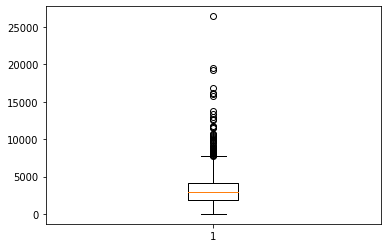

In [18]:
plt.boxplot(df1['mosquito'])

## 2. 서울 DMS + 7일 전 기후

### Reading Data

In [19]:
df2 = pd.read_csv('../데이터/통합 데이터/2. dms_seoul_07.csv')

df2

,date,mosquito,temp,l_temp,h_temp,rain_per_day,cum_rain,wind,dew,humidity,steam_pressure,sunshine_time,sunshine,ground_surface_temp
0,2015-04-06,199,12.0,7.4,17.6,6.5,1,5.9,1.9,53.9,7.1,5.6,14.89,14.7
1,2015-04-07,146,6.9,5.8,8.0,10.5,2,2.7,5.3,89.9,8.9,0.0,5.33,9.8
2,2015-04-08,90,11.1,5.6,17.0,1.0,3,2.9,5.8,72.0,9.2,8.5,16.51,13.6
3,2015-04-09,172,9.9,6.9,14.8,7.0,4,3.6,4.4,69.5,8.5,1.1,3.64,8.7
4,2015-04-10,249,10.5,4.8,16.1,NaN,0,3.7,-1.7,45.4,5.4,12.1,22.45,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,2020-10-27,535,5.1,2.7,8.6,0.5,3,3.5,-5.4,47.5,4.1,9.2,15.22,6.1
1169,2020-10-28,884,4.9,0.2,10.8,NaN,0,2.3,-7.1,43.9,3.7,9.6,15.36,5.2
1170,2020-10-29,695,9.6,3.4,15.9,NaN,0,1.8,2.3,61.5,7.3,8.4,12.77,10.5
1171,2020-10-30,543,13.5,9.9,17.2,NaN,0,1.7,6.4,63.3,9.8,0.3,5.65,12.5


In [20]:
df2.isnull().sum()

date                     0
mosquito                 0
temp                     0
l_temp                   0
h_temp                   0
rain_per_day           794
cum_rain                 0
wind                     0
dew                      0
humidity                 0
steam_pressure           0
sunshine_time            0
sunshine                 0
ground_surface_temp      0
dtype: int64

In [21]:
sum(np.isnan(df2['rain_per_day']))

794

In [22]:
# temp(평균기온)만 남기고 평균기온과 상관성이 큰 컬럼과 date 컬럼 제거
date = df2['date']
df2.drop(['date', 'l_temp', 'h_temp', 'dew', 'ground_surface_temp'], axis=1, inplace=True)

df2

,mosquito,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
0,199,12.0,6.5,1,5.9,53.9,7.1,5.6,14.89
1,146,6.9,10.5,2,2.7,89.9,8.9,0.0,5.33
2,90,11.1,1.0,3,2.9,72.0,9.2,8.5,16.51
3,172,9.9,7.0,4,3.6,69.5,8.5,1.1,3.64
4,249,10.5,NaN,0,3.7,45.4,5.4,12.1,22.45
...,...,...,...,...,...,...,...,...,...
1168,535,5.1,0.5,3,3.5,47.5,4.1,9.2,15.22
1169,884,4.9,NaN,0,2.3,43.9,3.7,9.6,15.36
1170,695,9.6,NaN,0,1.8,61.5,7.3,8.4,12.77
1171,543,13.5,NaN,0,1.7,63.3,9.8,0.3,5.65


### Setting Target Variable

In [23]:
y = df2['mosquito']
X = df2.drop('mosquito', axis=1)

In [24]:
y.head()

0    199
1    146
2     90
3    172
4    249
Name: mosquito, dtype: int64

In [25]:
X.head()

,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
0,12.0,6.5,1,5.9,53.9,7.1,5.6,14.89
1,6.9,10.5,2,2.7,89.9,8.9,0.0,5.33
2,11.1,1.0,3,2.9,72.0,9.2,8.5,16.51
3,9.9,7.0,4,3.6,69.5,8.5,1.1,3.64
4,10.5,NaN,0,3.7,45.4,5.4,12.1,22.45


### Imputation

In [26]:
y = y.values
X = X.values

sum(np.isnan(X).flatten())

794

In [27]:
X_trans = imputer.transform(X)

In [28]:
sum(np.isnan(X_trans).flatten())

0

### To CSV

In [29]:
y = pd.DataFrame(y, columns=['mosquito'])

y.head()

,mosquito
0,199
1,146
2,90
3,172
4,249


In [30]:
X_trans = pd.DataFrame(X_trans, columns=['temp', 'rain_per_day', 'cum_rain', 'wind', 'humidity', 'steam_pressure', 'sunshine_time', 'sunshine'])

X_trans.head()

,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
0,12.0,6.5,1.0,5.9,53.9,7.1,5.6,14.89
1,6.9,10.5,2.0,2.7,89.9,8.9,0.0,5.33
2,11.1,1.0,3.0,2.9,72.0,9.2,8.5,16.51
3,9.9,7.0,4.0,3.6,69.5,8.5,1.1,3.64
4,10.5,0.0,0.0,3.7,45.4,5.4,12.1,22.45


In [31]:
data2 = pd.concat([date, y, X_trans], axis=1)

data2.head()

,date,mosquito,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
0,2015-04-06,199,12.0,6.5,1.0,5.9,53.9,7.1,5.6,14.89
1,2015-04-07,146,6.9,10.5,2.0,2.7,89.9,8.9,0.0,5.33
2,2015-04-08,90,11.1,1.0,3.0,2.9,72.0,9.2,8.5,16.51
3,2015-04-09,172,9.9,7.0,4.0,3.6,69.5,8.5,1.1,3.64
4,2015-04-10,249,10.5,0.0,0.0,3.7,45.4,5.4,12.1,22.45


In [32]:
data2.to_csv('2. dms_seoul_07.csv', index=False)
# index 컬럼이 새로 생성되기 때문에 csv 파일에서 컬럼 제거 필요

## 3. 서울 DMS + 14일 전 기후

### Reading Data

In [33]:
df3 = pd.read_csv('../데이터/통합 데이터/3. dms_seoul_14.csv')

df3

,date,mosquito,temp,l_temp,h_temp,rain_per_day,cum_rain,wind,dew,humidity,steam_pressure,sunshine_time,sunshine,ground_surface_temp
0,2015-04-06,199,12.2,10.3,16.8,5.5,2,3.2,7.6,75.3,10.5,3.2,8.68,14.3
1,2015-04-07,146,14.0,7.7,20.9,NaN,0,2.9,0.1,46.0,6.6,12.5,22.93,15.8
2,2015-04-08,90,14.2,9.3,20.7,NaN,0,3.0,2.7,47.0,7.5,11.2,19.32,15.0
3,2015-04-09,172,14.5,8.0,20.1,NaN,0,3.5,0.0,41.1,6.2,10.8,21.03,15.7
4,2015-04-10,249,15.7,10.4,22.8,NaN,0,3.2,-0.1,38.3,6.3,12.2,22.53,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,2020-10-27,535,7.7,3.5,12.9,NaN,0,2.2,-0.9,56.1,5.8,9.6,13.61,7.9
1169,2020-10-28,884,9.3,3.5,16.5,NaN,0,1.6,-0.2,53.5,6.1,9.6,12.96,8.7
1170,2020-10-29,695,10.4,4.6,17.7,NaN,0,1.7,1.6,56.9,6.9,9.4,12.27,9.2
1171,2020-10-30,543,12.2,8.5,17.6,NaN,0,1.6,6.9,71.5,10.0,5.5,8.92,12.1


In [34]:
df3.isnull().sum()

date                     0
mosquito                 0
temp                     0
l_temp                   0
h_temp                   0
rain_per_day           794
cum_rain                 0
wind                     0
dew                      0
humidity                 0
steam_pressure           0
sunshine_time            0
sunshine                 0
ground_surface_temp      0
dtype: int64

In [35]:
sum(np.isnan(df3['rain_per_day']))

794

In [36]:
# temp(평균기온)만 남기고 평균기온과 상관성이 큰 컬럼과 date 컬럼 제거
date = df3['date']
df3.drop(['date', 'l_temp', 'h_temp', 'dew', 'ground_surface_temp'], axis=1, inplace=True)

df3

,mosquito,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
0,199,12.2,5.5,2,3.2,75.3,10.5,3.2,8.68
1,146,14.0,NaN,0,2.9,46.0,6.6,12.5,22.93
2,90,14.2,NaN,0,3.0,47.0,7.5,11.2,19.32
3,172,14.5,NaN,0,3.5,41.1,6.2,10.8,21.03
4,249,15.7,NaN,0,3.2,38.3,6.3,12.2,22.53
...,...,...,...,...,...,...,...,...,...
1168,535,7.7,NaN,0,2.2,56.1,5.8,9.6,13.61
1169,884,9.3,NaN,0,1.6,53.5,6.1,9.6,12.96
1170,695,10.4,NaN,0,1.7,56.9,6.9,9.4,12.27
1171,543,12.2,NaN,0,1.6,71.5,10.0,5.5,8.92


### Setting Target Variable

In [37]:
y = df3['mosquito']
X = df3.drop('mosquito', axis=1)

In [38]:
y.head()

0    199
1    146
2     90
3    172
4    249
Name: mosquito, dtype: int64

In [39]:
X.head()

,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
0,12.2,5.5,2,3.2,75.3,10.5,3.2,8.68
1,14.0,NaN,0,2.9,46.0,6.6,12.5,22.93
2,14.2,NaN,0,3.0,47.0,7.5,11.2,19.32
3,14.5,NaN,0,3.5,41.1,6.2,10.8,21.03
4,15.7,NaN,0,3.2,38.3,6.3,12.2,22.53


### Imputation

In [40]:
y = y.values
X = X.values

sum(np.isnan(X).flatten())

794

In [41]:
imputer.fit(X)

SimpleImputer(fill_value=0, strategy='constant')

In [42]:
X_trans = imputer.transform(X)

In [43]:
sum(np.isnan(X_trans).flatten())

0

### To CSV

In [44]:
y = pd.DataFrame(y, columns=['mosquito'])

y.head()

,mosquito
0,199
1,146
2,90
3,172
4,249


In [45]:
X_trans = pd.DataFrame(X_trans, columns=['temp', 'rain_per_day', 'cum_rain', 'wind', 'humidity', 'steam_pressure', 'sunshine_time', 'sunshine'])

X_trans.head()

,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
0,12.2,5.5,2.0,3.2,75.3,10.5,3.2,8.68
1,14.0,0.0,0.0,2.9,46.0,6.6,12.5,22.93
2,14.2,0.0,0.0,3.0,47.0,7.5,11.2,19.32
3,14.5,0.0,0.0,3.5,41.1,6.2,10.8,21.03
4,15.7,0.0,0.0,3.2,38.3,6.3,12.2,22.53


In [46]:
data3 = pd.concat([date, y, X_trans], axis=1)

data3.head()

,date,mosquito,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
0,2015-04-06,199,12.2,5.5,2.0,3.2,75.3,10.5,3.2,8.68
1,2015-04-07,146,14.0,0.0,0.0,2.9,46.0,6.6,12.5,22.93
2,2015-04-08,90,14.2,0.0,0.0,3.0,47.0,7.5,11.2,19.32
3,2015-04-09,172,14.5,0.0,0.0,3.5,41.1,6.2,10.8,21.03
4,2015-04-10,249,15.7,0.0,0.0,3.2,38.3,6.3,12.2,22.53


In [47]:
data3.to_csv('3. dms_seoul_14.csv', index=False)
# index 컬럼이 새로 생성되기 때문에 csv 파일에서 컬럼 제거 필요

## 4. Normarlization

**Box plot**을 그려보니 대부분의 데이터가 이상치 → <span style="color:blue">***Normalization 필요***</span>

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
trans = MinMaxScaler()

In [50]:
norm1 = trans.fit_transform(data1.drop('date', axis=1))
norm2 = trans.fit_transform(data2.drop('date', axis=1))
norm3 = trans.fit_transform(data3.drop('date', axis=1))

In [51]:
df1_norm = pd.DataFrame(norm1, columns=['mosquito', 'temp', 'rain_per_day', 'cum_rain', 'wind', 'humidity', 'steam_pressure', 'sunshine_time', 'sunshine'])
df2_norm = pd.DataFrame(norm2, columns=['mosquito', 'temp', 'rain_per_day', 'cum_rain', 'wind', 'humidity', 'steam_pressure', 'sunshine_time', 'sunshine'])
df3_norm = pd.DataFrame(norm3, columns=['mosquito', 'temp', 'rain_per_day', 'cum_rain', 'wind', 'humidity', 'steam_pressure', 'sunshine_time', 'sunshine'])

In [52]:
df1_norm.describe()

,mosquito,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000
mean,0.126104,0.575848,0.032372,0.060374,0.252619,0.540618,0.482052,0.518379,0.515671
std,0.092734,0.181411,0.102966,0.120046,0.123391,0.194757,0.234113,0.313111,0.226383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.069816,0.448763,0.000000,0.000000,0.175439,0.405738,0.284746,0.233577,0.340257
50%,0.112893,0.600707,0.000000,0.000000,0.228070,0.542350,0.457627,0.583942,0.521266
75%,0.158882,0.699647,0.006920,0.090909,0.315789,0.666667,0.664407,0.781022,0.694362
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df2_norm.describe()

,mosquito,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000
mean,0.126104,0.623432,0.032293,0.060451,0.333107,0.542858,0.480619,0.514757,0.505330
std,0.092734,0.165584,0.102958,0.120036,0.113198,0.191230,0.234902,0.312238,0.228927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.069816,0.509317,0.000000,0.000000,0.250000,0.411202,0.281356,0.233577,0.328501
50%,0.112893,0.649068,0.000000,0.000000,0.312500,0.542350,0.454237,0.583942,0.504448
75%,0.158882,0.736025,0.006920,0.090909,0.390625,0.663934,0.664407,0.773723,0.688962
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
df3_norm.describe()

,mosquito,temp,rain_per_day,cum_rain,wind,humidity,steam_pressure,sunshine_time,sunshine
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000
mean,0.126104,0.619068,0.032423,0.059909,0.331189,0.543210,0.490470,0.511658,0.495517
std,0.092734,0.175450,0.103487,0.119101,0.112248,0.188603,0.232193,0.310309,0.228745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.069816,0.509259,0.000000,0.000000,0.250000,0.414966,0.294702,0.226277,0.322570
50%,0.112893,0.651235,0.000000,0.000000,0.312500,0.541497,0.466887,0.583942,0.496211
75%,0.158882,0.737654,0.006920,0.090909,0.375000,0.661224,0.672185,0.766423,0.676442
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
df1_norm.to_csv('1. dms_seoul_norm.csv', index=False)
df2_norm.to_csv('2. dms_seoul_07_norm.csv', index=False)
df3_norm.to_csv('3. dms_seoul_14_norm.csv', index=False)
# index 컬럼이 새로 생성되기 때문에 csv 파일에서 컬럼 제거 필요

{'whiskers': [<matplotlib.lines.Line2D at 0x21eed73ab50>,
 'caps': [<matplotlib.lines.Line2D at 0x21eed7312b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21eed73a7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x21eed7319d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21eed731ca0>],
 'means': []}

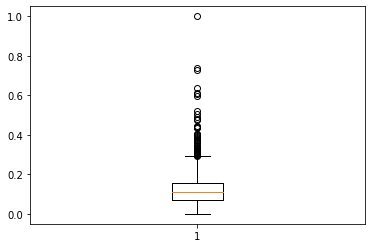

In [56]:
plt.boxplot(df1_norm['mosquito'])